<a href="https://colab.research.google.com/github/WaltGurley/integrating-apis-in-python/blob/master/Integrating_APIs_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrating APIs in Python

This workshop provides an introduction to interacting with data APIs using the Python programming language. We will cover connecting to a dataset using an API, querying data using a defined protocol, converting and formatting data for use in Python, and basic data analysis and visualization.

# Introduction: A brief overview of web data APIs and JSON
---

## Web Data APIs

>When used in the context of web development, an API is typically a defined set of specifications, such as Hypertext Transfer Protocol (HTTP) request messages, along with a definition of the structure of response messages, which is usually in an Extensible Markup Language (XML) or JavaScript Object Notation (JSON) format.

[Wikipedia](https://en.wikipedia.org/wiki/Application_programming_interface#Web_APIs)

![alt text](http://media2.govtech.com/images/940*603/api_infographic_smartfile_crop.jpg)

Retrieved from [What's an API and Why Do You Need One?](http://www.govtech.com/applications/Whats-an-API-and-Why-Do-You-Need-One.html)


## Examples of Web APIs

- [Twitter APIs](https://developer.twitter.com/en/docs.html)
- [Data.gov APIs](https://api.data.gov/)
- [The Star Wars API (SWAPI)](https://swapi.co/)
- [Google Dataset Search](https://toolbox.google.com/datasetsearch/search?query=format%3Aapi)

## JSON Data Types

- Strings: `"name":"Jacob"`
- Numbers: `"age":30`
- Objects: `"employee": { "name":"Jacob", "age":30}`
- Arrays: `"employees": ["Jacob", "Walt"]`
- Booleans: `"librarian":true`

[More on JSON Data Types](https://www.w3schools.com/js/js_json_datatypes.asp)

## Complex JSON Example

```json
{
  "paintings": [
    {
      "name": "The Scream",
      "url": "https://en.wikipedia.org/wiki/The_Scream",
      "creator": {
        "@type": "Person",
        "name": "Edvard Munch",
        "sameAs": "https://en.wikipedia.org/wiki/Edvard_Munch"
      }
    },
    {
      "name": "Melancholy",
      "url": "https://en.wikipedia.org/wiki/Melancholy_(Edvard_Munch)",
      "creator": {
        "@type": "Person",
        "name": "Edvard Munch",
        "sameAs": "https://en.wikipedia.org/wiki/Edvard_Munch"
      }
    }
  ]
}
```

# Guided activity
---
*This activity provides a general workflow of integrating a data API into a Python codebase. We will use the Python HTTP library [requests](http://docs.python-requests.org/en/master/) to access data from the [Star Wars API (SWAPI)](https://swapi.co/).*

## 1. Set up and test the data API connection

---

To use the requests library it must first be **imported** into our code (note that the requests library is pre-installed in Colaboratory). To simplify the rest of our activities we will create a `baseUrl` variable that contains the root URL of all the requests we will make. We will test our connection to this URL to ensure we have a valid resource.

In [1]:
# Import the Python library 'requests'
import requests

# Set the base URL for the SWAPI, determined from the docs page. This is the
# root resource.
baseUrl = "https://swapi.co/api/"

# Test a get request to the base URL (store in variable rTest)
rTest = requests.get(baseUrl)
rTest.status_code # Do you get 200?

200

## 2. Examine a response from the API

---

We will explore the ways in which we can decode data provided by a get request and figure out the best way to work with the SWAPI data.

### Decoding data returned by a request

We can access the data returned by our get request in a couple of ways...

In [2]:
# Raw data
rTest.raw
print("Output of rTest.raw: " + str(rTest.raw) + "\n")

# As bytes
rTest.content
print("Output of rTest.content: " + str(rTest.content) + "\n")

# As a string
rTest.text
print("Output of rTest.text: " + rTest.text + "\n")


Output of rTest.raw: <urllib3.response.HTTPResponse object at 0x7f66e56b9630>

Output of rTest.content: b'{"people":"https://swapi.co/api/people/","planets":"https://swapi.co/api/planets/","films":"https://swapi.co/api/films/","species":"https://swapi.co/api/species/","vehicles":"https://swapi.co/api/vehicles/","starships":"https://swapi.co/api/starships/"}'

Output of rTest.text: {"people":"https://swapi.co/api/people/","planets":"https://swapi.co/api/planets/","films":"https://swapi.co/api/films/","species":"https://swapi.co/api/species/","vehicles":"https://swapi.co/api/vehicles/","starships":"https://swapi.co/api/starships/"}



The above data types are not very helpful or easy to work with if we want to analyze the data contained in the SWAPI resource. 

### Check out the SWAPI data encoding
Every response from the API includes HTTP headers that provide some information about the response. We can print out this information and check out the **content type** of our response.

In [3]:
# Print out the request response headers
rTest.headers # What is the content type?

{'Date': 'Wed, 13 Feb 2019 14:39:22 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=de28c294a8fe34b9adbe44be108b49c871550068762; expires=Thu, 13-Feb-20 14:39:22 GMT; path=/; domain=.swapi.co; HttpOnly; Secure', 'Vary': 'Accept, Cookie', 'X-Frame-Options': 'SAMEORIGIN', 'Etag': 'W/"c1df070b0509ebefe72e85d721f40bf0"', 'Allow': 'GET, HEAD, OPTIONS', 'Via': '1.1 vegur', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '4a880b45cef879ed-SEA', 'Content-Encoding': 'gzip'}

### *Requests* JSON decoder

The requests library has a built-in JSON decoder for request responses that consist of JSON data. This decoder will produce a [Python Dictionary](https://www.programiz.com/python-programming/dictionary) for easy integation into our code. A dictionary consists of **key/value pairs**—a structure very similar to JSON.

In [4]:
# Print out the response body as a Python Dictionary
testJson = rTest.json()
testJson

{'films': 'https://swapi.co/api/films/',
 'people': 'https://swapi.co/api/people/',
 'planets': 'https://swapi.co/api/planets/',
 'species': 'https://swapi.co/api/species/',
 'starships': 'https://swapi.co/api/starships/',
 'vehicles': 'https://swapi.co/api/vehicles/'}

***TODO: Use the code cell below to test some of the ways you can access and manipulate data in Dictionaries***

In [0]:
# Test dictionary access by getting the value contained in the 'species' key of
# testJson
# testJson['species']

# Print out the keys of testJson
# testJson.keys()

# Print out each key: value pair contained in testJson
# for key, value in testJson.items():
#   print(key + ": " + value)

## 3. Get specific data
---
We will explore how to access multiple resources and a single resource from the SWAPI.

### Accessing multiple resources of one type
The SWAPI consists six resource types listed in the root resource (films, people, planets, species, starships, and vehicles). We can access a list containing all resources of one type by calling the location of those resources. For example:
```
https://swapi.co/api/[resource_name]
```

In [0]:
# Get a list of the films from the API (located at https://swapi.co/api/films)
films = requests.get(baseUrl + "films")

***TODO: Use the code cell below to print out a list of the data of all the film resources***

In [0]:
# HINT: use the JSON decoder provided by the requests library. The data for
# each film is located in a key titled 'results'

### Accessing one resource of a specific type
We can access a single resource of a specific type by calling the API at that specific resource's location. In the case of the SWAPI an individual resource is identified by calling a specific numerical id (`:id`) within the resource type (e.g., `.../[resource_name]/:id`). An id represents the location of that particular resource in the list of resources.



In [8]:
# Get the fourth resource contained in the films resource
film4 = requests.get(baseUrl + "films/4").json()
film4

{'characters': ['https://swapi.co/api/people/2/',
  'https://swapi.co/api/people/3/',
  'https://swapi.co/api/people/10/',
  'https://swapi.co/api/people/11/',
  'https://swapi.co/api/people/16/',
  'https://swapi.co/api/people/20/',
  'https://swapi.co/api/people/21/',
  'https://swapi.co/api/people/32/',
  'https://swapi.co/api/people/33/',
  'https://swapi.co/api/people/34/',
  'https://swapi.co/api/people/36/',
  'https://swapi.co/api/people/37/',
  'https://swapi.co/api/people/38/',
  'https://swapi.co/api/people/39/',
  'https://swapi.co/api/people/40/',
  'https://swapi.co/api/people/41/',
  'https://swapi.co/api/people/42/',
  'https://swapi.co/api/people/43/',
  'https://swapi.co/api/people/44/',
  'https://swapi.co/api/people/46/',
  'https://swapi.co/api/people/48/',
  'https://swapi.co/api/people/49/',
  'https://swapi.co/api/people/50/',
  'https://swapi.co/api/people/51/',
  'https://swapi.co/api/people/52/',
  'https://swapi.co/api/people/53/',
  'https://swapi.co/api/pe

***TODO: Use the cell below to access the 2nd resource contained in films and print out the title and release date of this film***

In [0]:
# HINT: use the JSON decoder provided by the requests library. The data for
# a film is located in a key titled 'results'

### Accessing resource metadata
So far we have accessed resource data. What if you need to know what a particular key represents? For example, in the Films resource, what does data contained in 'opening_crawl' describe? We can access metadata about a specific resource by calling the 'schema' of a particular resource. The SWAPI provides a schema for each resource located at `.../[resource_name]/schema`

In [10]:
# Get the films schema
filmsSchema = requests.get(baseUrl + "films/schema").json()
filmsSchema

{'$schema': 'http://json-schema.org/draft-04/schema',
 'description': 'A Star Wars film',
 'properties': {'characters': {'description': 'The people resources featured within this film.',
   'type': 'array'},
  'created': {'description': 'The ISO 8601 date format of the time that this resource was created.',
   'format': 'date-time',
   'type': 'string'},
  'director': {'description': 'The director of this film.', 'type': 'string'},
  'edited': {'description': 'the ISO 8601 date format of the time that this resource was edited.',
   'format': 'date-time',
   'type': 'string'},
  'episode_id': {'description': 'The episode number of this film.',
   'type': 'integer'},
  'opening_crawl': {'description': 'The opening crawl text at the beginning of this film.',
   'type': 'string'},
  'planets': {'description': 'The planet resources featured within this film.',
   'type': 'array'},
  'producer': {'description': 'The producer(s) of this film.',
   'type': 'string'},
  'release_date': {'descri

***TODO: Use the code cell below to print out the title of the 1st episode of the film series***

In [11]:
# HINT: use the schema to determine what key provides the relevant data,
# and use the data provided by the films resources to find the correct resource
for film in films.json()['results']:
  if film['episode_id'] == 1:
    print(film['title'])

The Phantom Menace


## 4. Pagination and parameters
---
An API request has the possibility to return a lot of data. In order to ensure that requested data is returned efficiently many APIs have a mechanism to limit the total amount of data returned per request. Often, large datasets from an API are returned in smaller chunks as 'pages,' where each page contains a limited number of resources that successively compose the entire dataset (e.g., page 1 contains resources 1-10, page 2 contains resources 11-20, etc.).

The SWAPI paginates large requests–requiring a specific page parameter to be called in order to access pages beyond page 1. Conveniently, the requests library provides a way to easily provide parameters when making a request.

### Observe paginated results with the 'planets' resource
We can see how SWAPI requests are paginated by requesting a large list of resources.

***TODO: Use the code cell below to request the 'planets' resource and print out the decoded JSON data***

In [12]:
# HINT: the planets resource is located at https://swapi.co/api/planets
planets = requests.get(baseUrl + 'planets').json()
planets

{'count': 61,
 'next': 'https://swapi.co/api/planets/?page=2',
 'previous': None,
 'results': [{'climate': 'temperate',
   'created': '2014-12-10T11:35:48.479000Z',
   'diameter': '12500',
   'edited': '2014-12-20T20:58:18.420000Z',
   'films': ['https://swapi.co/api/films/6/', 'https://swapi.co/api/films/1/'],
   'gravity': '1 standard',
   'name': 'Alderaan',
   'orbital_period': '364',
   'population': '2000000000',
   'residents': ['https://swapi.co/api/people/5/',
    'https://swapi.co/api/people/68/',
    'https://swapi.co/api/people/81/'],
   'rotation_period': '24',
   'surface_water': '40',
   'terrain': 'grasslands, mountains',
   'url': 'https://swapi.co/api/planets/2/'},
  {'climate': 'temperate, tropical',
   'created': '2014-12-10T11:37:19.144000Z',
   'diameter': '10200',
   'edited': '2014-12-20T20:58:18.421000Z',
   'films': ['https://swapi.co/api/films/1/'],
   'gravity': '1 standard',
   'name': 'Yavin IV',
   'orbital_period': '4818',
   'population': '1000',
   're

***TODO: Use the code cell below to print out 1) the total number of planets in the SWAPI and 2) the length of the results returned by the 'planets' request***

In [13]:
# HINT: the number of planets is stored in a key named 'count'. The actual
# number of planet resources returned by the request can be determined by
# finding the length of the results of the decoded request (use the Python 
# method len() to find the lingth of a list).
print(len(planets['results']), planets['count'])

10 61


### Requesting a specific page with query parameters

The SWAPI provides access to a specific numbered page of resource results using a URL query string. A query string consists of the URL resource being requested followed by a question mark and key/value pairs representing query structures. For example, a URL to request the 2nd page of the planets resource would be written:

```
https://swapi.co/api/planets?page=2
```

Where the key is represented by `page` and the value is `2`. Many APIs provide the ability to make a request with multiple query paramenters.

***TODO: Use the code cell below to print out the decoded response of a request to the 3rd page of the planets resource***

The request library provides a more programmatic way to include query parameters in a URL request with the keyword argument `params`. You can include query parameters by providing a Dictionary containing key/vlaue pairs that represent the key/value pairs of your query.

For example, the previous query for the 3rd page of the planets resource would be constructed:
```
requests.get(baseUrl + 'planets', params={"page": 3})
```


***TODO: Use the code cell below to make a request to the 7th page of the planets resource using the request library `params` keyword argument and print the decoded results***

In [14]:
planets = requests.get(baseUrl + 'planets', params={"page": 7})
planets.json()

{'count': 61,
 'next': None,
 'previous': 'https://swapi.co/api/planets/?page=6',
 'results': [{'climate': 'unknown',
   'created': '2015-04-17T06:55:57.556495Z',
   'diameter': 'unknown',
   'edited': '2015-04-17T06:55:57.556551Z',
   'films': ['https://swapi.co/api/films/7/'],
   'gravity': 'unknown',
   'name': 'Jakku',
   'orbital_period': 'unknown',
   'population': 'unknown',
   'residents': [],
   'rotation_period': 'unknown',
   'surface_water': 'unknown',
   'terrain': 'deserts',
   'url': 'https://swapi.co/api/planets/61/'}]}

### Accessing all data from a paginated resource

To access all of the data from a paginated resource we have to make a call to each individual page. This could be done by writing a call to each page as individual lines of code:

```
requests.get(baseUrl + 'planets', params={"page": 1})
requests.get(baseUrl + 'planets', params={"page": 2})
...
requests.get(baseUrl + 'planets', params={"page": 7})
```

This code is not concise and this structure would not be feasible if the dataset is extremely large. Instead, we can use information returned from a page request to determine if another page is available and, if available, request the next page. Repeatedly perfroming this action would provide data for all pages including the intially requested page.

The SWAPI provides a key value of `next` for each page request that contains the URL of the location of the next successive page of data for this resource, if there is a next page (*look at the `next` key value printed in the two previous cells to see what the value is when another page is available and when it is not*). Using the value stored in `next` we can write a loop to succesively request a page while another page is available. For the planets resource, this could be set up as shown below.

In [15]:
# Set the initial page number to request
pageNum = 1

# Create an initial request to the set page of the planets resource
initialRequest = requests.get(baseUrl + 'planets', params={'page': pageNum}).json()

# Store the list of results
allPlanets = initialRequest['results']

# Get value the contained in next
nextPage = initialRequest['next']

# Create a loop that runs while nextPage does not equal None
while (nextPage != None):
  # Increment the pageNum value by one
  pageNum += 1
  
  # Make a new request with the updated page number
  planets = requests.get(baseUrl + 'planets', params={'page': pageNum}).json()
  
  # Add the list of results from this request to the existing list
  allPlanets.extend(planets['results'])
  
  # Get value the contained in next
  nextPage = planets['next']

# Check that we have the correct number of planets in allPlanets
len(allPlanets)

61

This code can be generalized to create a function that we can use to request all the resources of one type:

In [0]:
def getAllResources(resourceName):
  '''
    Return all resources of the type 'resourceName' from the SWAPI
    Valid values are: films, people, planets, species, starships, vehicles
  '''
  allResources = []
  nextPage = '1'
  pageNum = 1
  while (nextPage != None):
    resourcePage = requests.get(baseUrl + resourceName, params={'page': pageNum}).json()
    allResources.extend(resourcePage.get('results'))
    pageNum += 1
    nextPage = resourcePage.get('next')
  return allResources

In [17]:
allPeople = getAllResources('people')
allPeople

[{'birth_year': '19BBY',
  'created': '2014-12-09T13:50:51.644000Z',
  'edited': '2014-12-20T21:17:56.891000Z',
  'eye_color': 'blue',
  'films': ['https://swapi.co/api/films/2/',
   'https://swapi.co/api/films/6/',
   'https://swapi.co/api/films/3/',
   'https://swapi.co/api/films/1/',
   'https://swapi.co/api/films/7/'],
  'gender': 'male',
  'hair_color': 'blond',
  'height': '172',
  'homeworld': 'https://swapi.co/api/planets/1/',
  'mass': '77',
  'name': 'Luke Skywalker',
  'skin_color': 'fair',
  'species': ['https://swapi.co/api/species/1/'],
  'starships': ['https://swapi.co/api/starships/12/',
   'https://swapi.co/api/starships/22/'],
  'url': 'https://swapi.co/api/people/1/',
  'vehicles': ['https://swapi.co/api/vehicles/14/',
   'https://swapi.co/api/vehicles/30/']},
 {'birth_year': '112BBY',
  'created': '2014-12-10T15:10:51.357000Z',
  'edited': '2014-12-20T21:17:50.309000Z',
  'eye_color': 'yellow',
  'films': ['https://swapi.co/api/films/2/',
   'https://swapi.co/api/fi

## The search parameter

Another common feature of data APIs is the ability to search resources using query parameters. The SWAPI provides limited search capabilities on certain fields for each resource. For example, you can search the `person` resource using the `name` field. Similar to page requests, a search can be implemented using a query string with the key name `search` and a search string value. For example, to search for the name Luke:


```
https://swapi.co/api/people/?search=luke
```

According to the SWAPI documentation, searches are case-insensitive partial matches.

**TODO: Use the cell below to search people for the name 'Fett' using the request library `params` keyword argument and print the decoded results**

In [18]:
requests.get(baseUrl + 'people', params={'search': 'fett'}).json()

{'count': 2,
 'next': None,
 'previous': None,
 'results': [{'birth_year': '31.5BBY',
   'created': '2014-12-15T12:49:32.457000Z',
   'edited': '2014-12-20T21:17:50.349000Z',
   'eye_color': 'brown',
   'films': ['https://swapi.co/api/films/2/',
    'https://swapi.co/api/films/5/',
    'https://swapi.co/api/films/3/'],
   'gender': 'male',
   'hair_color': 'black',
   'height': '183',
   'homeworld': 'https://swapi.co/api/planets/10/',
   'mass': '78.2',
   'name': 'Boba Fett',
   'skin_color': 'fair',
   'species': ['https://swapi.co/api/species/1/'],
   'starships': ['https://swapi.co/api/starships/21/'],
   'url': 'https://swapi.co/api/people/22/',
   'vehicles': []},
  {'birth_year': '66BBY',
   'created': '2014-12-20T16:54:41.620000Z',
   'edited': '2014-12-20T21:17:50.465000Z',
   'eye_color': 'brown',
   'films': ['https://swapi.co/api/films/5/'],
   'gender': 'male',
   'hair_color': 'black',
   'height': '183',
   'homeworld': 'https://swapi.co/api/planets/53/',
   'mass': '79

## Using SWAPI data in Python

We will briefly cover formatting, analyzing, and graphing data from an API. Often the data obtained 'as is' from an API will need further processing in order to conduct analyses. The SWAPI data we are working with provides a good test example of common transformations that might need to be performed on similar data obtained from an API.

### Import specialized Python libraries for working with data
We will import two popular libraries for working with and graphing data in Python:

* **Pandas** - a data analysis library ([Pandas user guide](http://pandas.pydata.org/pandas-docs/stable/user_guide/index.html))
* **Matplotlib** - a Python 2D plotting library ([Matplotlib user guide](https://matplotlib.org/users/index.html))

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Creating a Pandas DataFrame
Pandas provides the DataFrame data structure as a way to more easily work with two-dimensional tabular data (rows and columns). We can quickly convert a list of dictionaries to a DataFrame by calling the Pandas DataFrame function:
```
df = pd.DataFrame([list_name])
```

**TODO: Use the cell below to create a DataFrame of the `allPlanets` list of planet resources. Store this in a variable named `planets_df` and print the results**

In [20]:
planets_df = pd.DataFrame(allPlanets)
planets_df

,climate,created,diameter,edited,films,gravity,name,orbital_period,population,residents,rotation_period,surface_water,terrain,url
0,temperate,2014-12-10T11:35:48.479000Z,12500,2014-12-20T20:58:18.420000Z,"[https://swapi.co/api/films/6/, https://swapi....",1 standard,Alderaan,364,2000000000,"[https://swapi.co/api/people/5/, https://swapi...",24,40,"grasslands, mountains",https://swapi.co/api/planets/2/
1,"temperate, tropical",2014-12-10T11:37:19.144000Z,10200,2014-12-20T20:58:18.421000Z,[https://swapi.co/api/films/1/],1 standard,Yavin IV,4818,1000,[],24,8,"jungle, rainforests",https://swapi.co/api/planets/3/
2,frozen,2014-12-10T11:39:13.934000Z,7200,2014-12-20T20:58:18.423000Z,[https://swapi.co/api/films/2/],1.1 standard,Hoth,549,unknown,[],23,100,"tundra, ice caves, mountain ranges",https://swapi.co/api/planets/4/
3,murky,2014-12-10T11:42:22.590000Z,8900,2014-12-20T20:58:18.425000Z,"[https://swapi.co/api/films/2/, https://swapi....",N/A,Dagobah,341,unknown,[],23,8,"swamp, jungles",https://swapi.co/api/planets/5/
4,temperate,2014-12-10T11:43:55.240000Z,118000,2014-12-20T20:58:18.427000Z,[https://swapi.co/api/films/2/],"1.5 (surface), 1 standard (Cloud City)",Bespin,5110,6000000,[https://swapi.co/api/people/26/],12,0,gas giant,https://swapi.co/api/planets/6/
5,temperate,2014-12-10T11:50:29.349000Z,4900,2014-12-20T20:58:18.429000Z,[https://swapi.co/api/films/3/],0.85 standard,Endor,402,30000000,[https://swapi.co/api/people/30/],18,8,"forests, mountains, lakes",https://swapi.co/api/planets/7/
6,temperate,2014-12-10T11:52:31.066000Z,12120,2014-12-20T20:58:18.430000Z,"[https://swapi.co/api/films/5/, https://swapi....",1 standard,Naboo,312,4500000000,"[https://swapi.co/api/people/3/, https://swapi...",26,12,"grassy hills, swamps, forests, mountains",https://swapi.co/api/planets/8/
7,temperate,2014-12-10T11:54:13.921000Z,12240,2014-12-20T20:58:18.432000Z,"[https://swapi.co/api/films/5/, https://swapi....",1 standard,Coruscant,368,1000000000000,"[https://swapi.co/api/people/34/, https://swap...",24,unknown,"cityscape, mountains",https://swapi.co/api/planets/9/
8,temperate,2014-12-10T12:45:06.577000Z,19720,2014-12-20T20:58:18.434000Z,[https://swapi.co/api/films/5/],1 standard,Kamino,463,1000000000,"[https://swapi.co/api/people/22/, https://swap...",27,100,ocean,https://swapi.co/api/planets/10/
9,"temperate, arid",2014-12-10T12:47:22.350000Z,11370,2014-12-20T20:58:18.437000Z,[https://swapi.co/api/films/5/],0.9 standard,Geonosis,256,100000000000,[https://swapi.co/api/people/63/],30,5,"rock, desert, mountain, barren",https://swapi.co/api/planets/11/


### Reformatting data for graphing
With a DataFrame we have access to functions to modify our dataset. We will remove unnecessary data fields (coulmns), edit existing fields, and create new data fields from existing fields.

#### Creating a new field
A new field can be added to an existing DataFrame. We will create a new field called `film_count` in `planets_df` that contains the number of films in which each planet appears. This value can be computed from the existing `films` field using the `apply` function.

In [21]:
planets_df["film_count"] = planets_df.films.apply(lambda x: len(x))
planets_df

,climate,created,diameter,edited,films,gravity,name,orbital_period,population,residents,rotation_period,surface_water,terrain,url,film_count
0,temperate,2014-12-10T11:35:48.479000Z,12500,2014-12-20T20:58:18.420000Z,"[https://swapi.co/api/films/6/, https://swapi....",1 standard,Alderaan,364,2000000000,"[https://swapi.co/api/people/5/, https://swapi...",24,40,"grasslands, mountains",https://swapi.co/api/planets/2/,2
1,"temperate, tropical",2014-12-10T11:37:19.144000Z,10200,2014-12-20T20:58:18.421000Z,[https://swapi.co/api/films/1/],1 standard,Yavin IV,4818,1000,[],24,8,"jungle, rainforests",https://swapi.co/api/planets/3/,1
2,frozen,2014-12-10T11:39:13.934000Z,7200,2014-12-20T20:58:18.423000Z,[https://swapi.co/api/films/2/],1.1 standard,Hoth,549,unknown,[],23,100,"tundra, ice caves, mountain ranges",https://swapi.co/api/planets/4/,1
3,murky,2014-12-10T11:42:22.590000Z,8900,2014-12-20T20:58:18.425000Z,"[https://swapi.co/api/films/2/, https://swapi....",N/A,Dagobah,341,unknown,[],23,8,"swamp, jungles",https://swapi.co/api/planets/5/,3
4,temperate,2014-12-10T11:43:55.240000Z,118000,2014-12-20T20:58:18.427000Z,[https://swapi.co/api/films/2/],"1.5 (surface), 1 standard (Cloud City)",Bespin,5110,6000000,[https://swapi.co/api/people/26/],12,0,gas giant,https://swapi.co/api/planets/6/,1
5,temperate,2014-12-10T11:50:29.349000Z,4900,2014-12-20T20:58:18.429000Z,[https://swapi.co/api/films/3/],0.85 standard,Endor,402,30000000,[https://swapi.co/api/people/30/],18,8,"forests, mountains, lakes",https://swapi.co/api/planets/7/,1
6,temperate,2014-12-10T11:52:31.066000Z,12120,2014-12-20T20:58:18.430000Z,"[https://swapi.co/api/films/5/, https://swapi....",1 standard,Naboo,312,4500000000,"[https://swapi.co/api/people/3/, https://swapi...",26,12,"grassy hills, swamps, forests, mountains",https://swapi.co/api/planets/8/,4
7,temperate,2014-12-10T11:54:13.921000Z,12240,2014-12-20T20:58:18.432000Z,"[https://swapi.co/api/films/5/, https://swapi....",1 standard,Coruscant,368,1000000000000,"[https://swapi.co/api/people/34/, https://swap...",24,unknown,"cityscape, mountains",https://swapi.co/api/planets/9/,4
8,temperate,2014-12-10T12:45:06.577000Z,19720,2014-12-20T20:58:18.434000Z,[https://swapi.co/api/films/5/],1 standard,Kamino,463,1000000000,"[https://swapi.co/api/people/22/, https://swap...",27,100,ocean,https://swapi.co/api/planets/10/,1
9,"temperate, arid",2014-12-10T12:47:22.350000Z,11370,2014-12-20T20:58:18.437000Z,[https://swapi.co/api/films/5/],0.9 standard,Geonosis,256,100000000000,[https://swapi.co/api/people/63/],30,5,"rock, desert, mountain, barren",https://swapi.co/api/planets/11/,1


#### Removing unecesary fields and rearrange data
We are not interested in all the data in our dataset. We can remove unnecessary fields using the DataFrame function `drop` and indicating which column names to remove. 

In [37]:
planets_drop = planets_df.drop(columns=["name", "climate", "created", "films",
                                        "edited", "gravity", "residents",
                                        "terrain", "url"])


planets_drop.insert(0, "name", planets_df.name)
planets_drop

,name,diameter,orbital_period,population,rotation_period,surface_water,film_count
0,Alderaan,12500,364,2000000000,24,40,2
1,Yavin IV,10200,4818,1000,24,8,1
2,Hoth,7200,549,unknown,23,100,1
3,Dagobah,8900,341,unknown,23,8,3
4,Bespin,118000,5110,6000000,12,0,1
5,Endor,4900,402,30000000,18,8,1
6,Naboo,12120,312,4500000000,26,12,4
7,Coruscant,12240,368,1000000000000,24,unknown,4
8,Kamino,19720,463,1000000000,27,100,1
9,Geonosis,11370,256,100000000000,30,5,1


#### Converting to the correct data type
If we look closely at the data returned by the SWAPI it might not be in the expected form. For example, we would expect the field `diameter` in the planets rsource to contain numerical values. However, if we look at the data type of an individual value we see this data is actually a string:

In [38]:
# Print the data type of the first diameter value in planets_drop
type(planets_drop.diameter[0])

str

In order to properly work with our data we need to convert the numbers that are currently encoded as strings to a numeric type.

In [56]:

planets_drop.iloc[:,1:] = planets_drop.iloc[:,1:].apply(
    lambda x: pd.to_numeric(x, errors="coerce"))
planets_drop

,name,diameter,orbital_period,population,rotation_period,surface_water,film_count
0,Alderaan,12500.0,364.0,2.000000e+09,24.0,40.0,2
1,Yavin IV,10200.0,4818.0,1.000000e+03,24.0,8.0,1
2,Hoth,7200.0,549.0,NaN,23.0,100.0,1
3,Dagobah,8900.0,341.0,NaN,23.0,8.0,3
4,Bespin,118000.0,5110.0,6.000000e+06,12.0,0.0,1
5,Endor,4900.0,402.0,3.000000e+07,18.0,8.0,1
6,Naboo,12120.0,312.0,4.500000e+09,26.0,12.0,4
7,Coruscant,12240.0,368.0,1.000000e+12,24.0,NaN,4
8,Kamino,19720.0,463.0,1.000000e+09,27.0,100.0,1
9,Geonosis,11370.0,256.0,1.000000e+11,30.0,5.0,1


#### Making graphs
With the new formatted data we can begin to check out some of the general features of the data set. We will create a bar graph to observe the film count of all the planets and determine if there is a relationship between a planet's orbital period and its rotation period.

<BarContainer object of 61 artists>

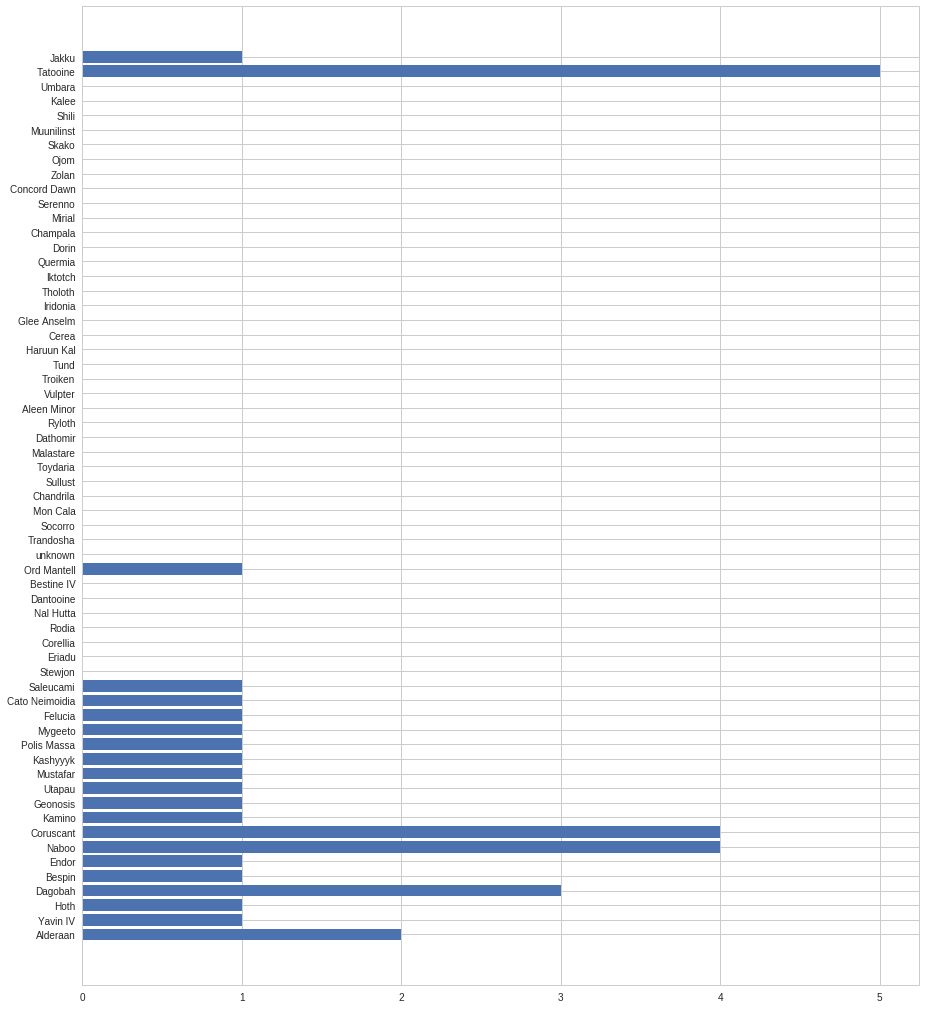

In [75]:
# Set the figure size of the plot
plt.figure(figsize=([15,18]))

# create a horizontal bar graph of planet name and planet film_count.
plt.barh(planets_drop.name, planets_drop.film_count)

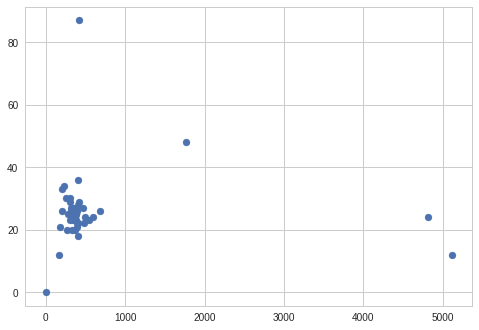

In [76]:
plt.scatter(planets_drop.orbital_period, planets_drop.rotation_period)